In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 直接读取波士顿的房价数据
data_url = 'http://lib.stat.cmu.edu/datasets/boston'
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

# 查看数据的前五行
raw_df

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [32]:
# 数据分为多行显示，每行包含不完整的记录，需要合并两行才能形成完整的记录
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :]])
target = raw_df.values[::2, 2] # 获取从0开始，每隔2行取数据，即获取第1列数据

# 将数据分开，分别为data训练集和target测试集
data.shape, target.shape


((506, 22), (506,))

In [33]:
# 拼接data和预测目标target
complete_data = np.column_stack([data, target])[:, :14]
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# df = pd.DataFrame(, columns=column)
df =pd.DataFrame(complete_data, columns=columns)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [34]:
df.info() # info()方法可以查看数据的基本信息，如数据类型、非空值数量、内存使用情况等

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [35]:
df.describe() # describe() 函数用于查看数据集的描述性统计信息，得到数据集的描述性统计信息，如平均值、中位数、最大值、最小值、标准差等。

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


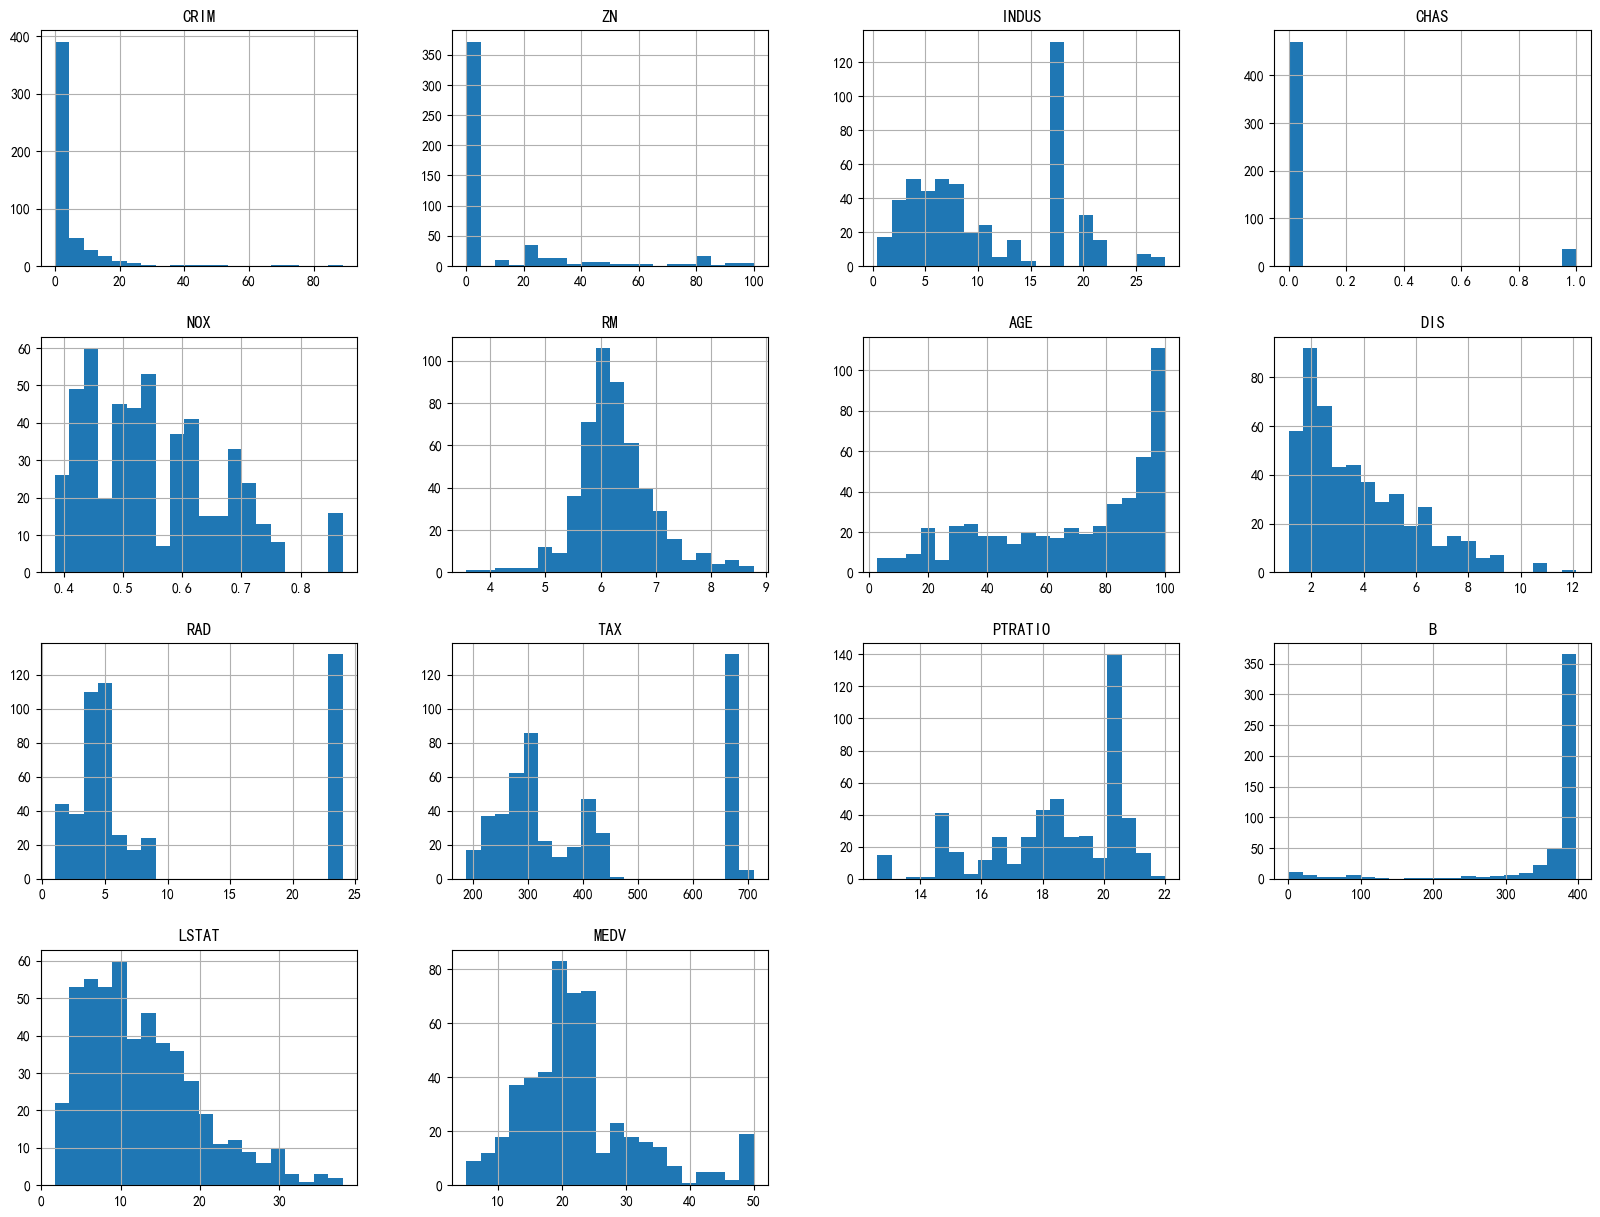

In [36]:
# 绘制直方图
df.hist(bins=20, figsize=(20, 15)) # bins: 直方图的条数, figsize: 图片的大小
plt.show()

In [37]:
# 绘制各个特征的房价的关系
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [38]:
# 计算相关矩阵
correlation_marix = df.corr() # corr() 是 Pandas 库中的一个函数，用于计算 DataFrame 中所有列之间的相关系数矩阵。相关系数矩阵是一个对称矩阵，其中每个元素表示两个变量之间的相关系数。相关系数的取值范围为 [-1, 1]，其中 -1 表示完全负相关，1 表示完全正相关，0 表示不相关。

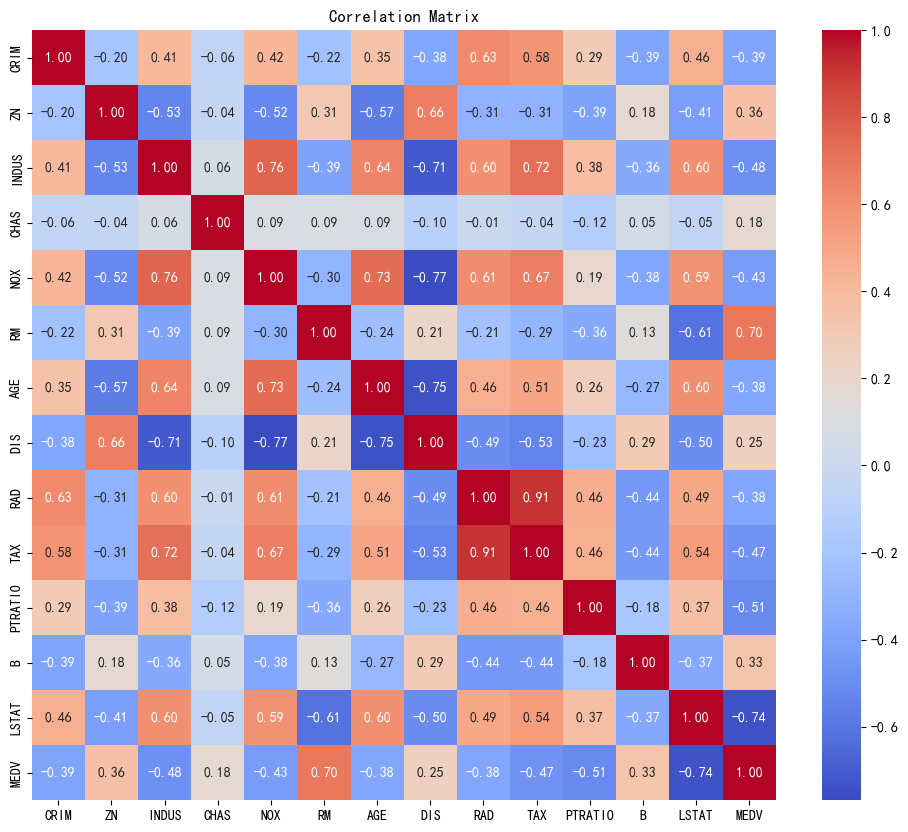

In [39]:
# 可视化相关矩阵
plt.figure(figsize=(12, 10)) # 设置图片大小
sns.heatmap(correlation_marix, annot=True, fmt=".2f", cmap="coolwarm") # 说明：annot=True表示在每个单元格中显示数值，fmt=".2f"表示保留两位小数，cmap="coolwarm"表示颜色映射
plt.title("Correlation Matrix") # 标题
plt.show() # 显示图片


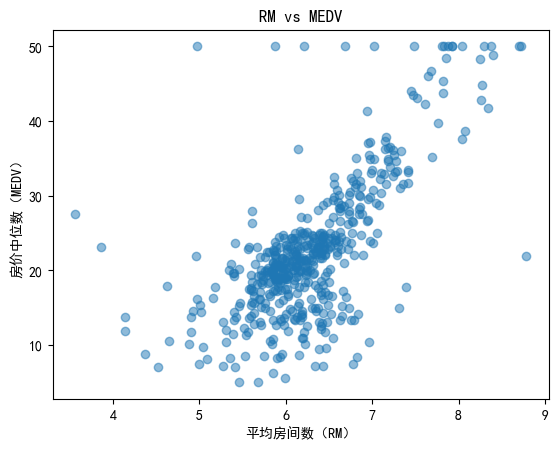

In [40]:
# 可视化刚才筛选的相关因素余房价的关系
import warnings
warnings.filterwarnings("ignore") # 说明：filterwarnings()函数用于忽略警告信息。
# 分析RM（房间数）与房价的关系
plt.scatter(df['RM'], df['MEDV'], alpha=0.5) # alpha 是透明度参数，用于控制散点的透明度。
plt.xlabel('平均房间数（RM）')
plt.ylabel('房价中位数（MEDV）')
plt.title('RM vs MEDV')
plt.show()

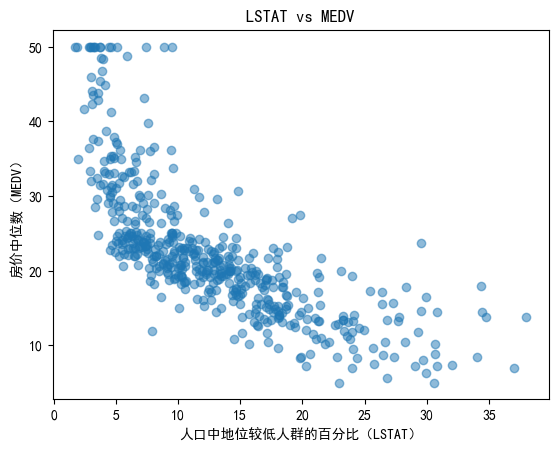

In [41]:
# 分析STAT（人口中地位较低人群的百分比）与房价的关系
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.5)
plt.xlabel('人口中地位较低人群的百分比（LSTAT）')
plt.ylabel('房价中位数（MEDV）')
plt.title('LSTAT vs MEDV')
plt.show()

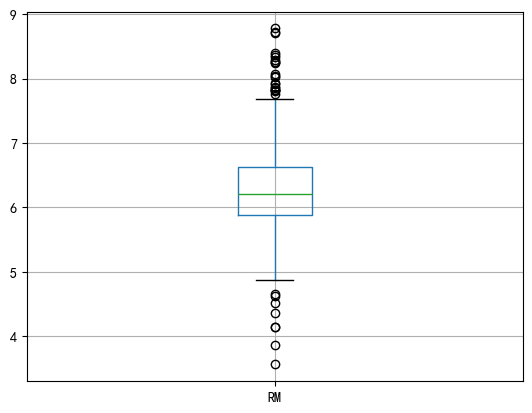

In [42]:
# 异常值处理
# 识别RM中的异常值
df.boxplot(column=['RM'])
plt.show()

# 删除异常值，超过上界的
# 认定大于8的属于异常值，将大于8的数据，用8替换掉
df.loc[df['RM'] > 8, 'RM'] = 8

### 线性回归模型假设多个影响房价的因素和房价之间是线性关系，属于多元线性回归，可以用线性回归方程来表示：
数学表达式：
$$
y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n
$$
线性回归模型训练的目的就是找到一组参数使得模型预测的误差最小，这里面用到了损失函数，最小二乘法，正则化等理论，这里布捕一一证明了，我们直接看模型训练和预测的效果。

In [43]:
from sklearn.model_selection import train_test_split # 内置的拆分数据函数
from sklearn.linear_model import LinearRegression # 线性回归模型
from sklearn.metrics import mean_squared_error, r2_score # 回归预测评估函数，MSE，R2

# 拆分特征和目标变量
X = df.drop(columns='MEDV', axis=1) # drop() 函数删除列 // MEDV 是目标变量
y = df['MEDV']

# 数据分割，拆出模型训练集和测试数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# 创建模型
model = LinearRegression() # 线性回归模型

# 调用训练模型参数，传入训练数据集
model.fit(X_train, y_train)

# 模型预测，传入测试数据集
y_pred = model.predict(X_test) # 模型预测
mse = mean_squared_error(y_test, y_pred) # 均方误差
r2 = r2_score(y_test, y_pred) # R2 系数 // 用于评估模型

print(f'均方误差（MSE）：{mse:.2f}')
print(f'R2 系数（R2）：{r2:.2f}')

均方误差（MSE）：24.52
R2 系数（R2）：0.67


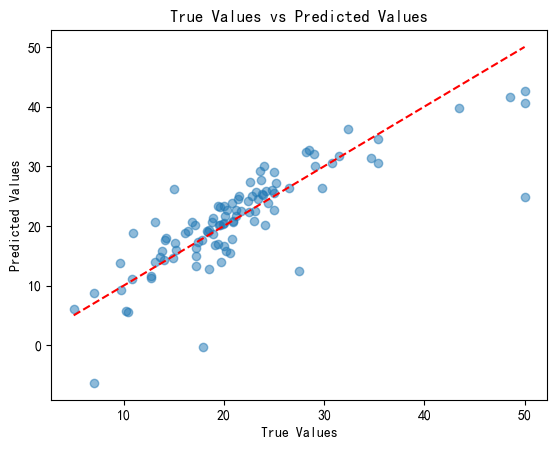

In [44]:
"""
我们可以通过可视化图来更加清晰的看到
"""
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True Values vs Predicted Values') # 绘制预测值和真实值的散点图
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [45]:
# 乘一组测试数据，试试预测价格
# 创建模型
model = LinearRegression()

# 调用训练模型参数，传入训练数据集
model.fit(X_train, y_train)

# 模型预测，传入测试数据集
y_pred = model.predict(X_test) # predict() 是 LinearRegression 类中的一个方法，用于根据已训练的模型对新数据进行预测。

# 看看数据集里每个不同的房屋价格
y_pred

array([29.1472062 , 36.15775472, 14.70790075, 24.98439748, 18.86560535,
       23.25297756, 17.65053707, 14.24975666, 23.08748799, 20.66720548,
       25.00073353, 18.66406534, -6.32843854, 21.72151871, 19.23657312,
       26.32421359, 20.6081664 ,  5.69575195, 40.67325732, 17.70004731,
       27.249151  , 30.09596318, 11.26143092, 24.20724919, 17.94711153,
       15.83039044, 22.73019597, 14.64342472, 22.4867489 , 19.20329162,
       22.48995653, 25.27801615, 26.12446718, 17.80676907, 16.77915353,
       17.04339355, 31.37996281, 20.13660064, 23.80172621, 24.57876572,
       13.87271619, 32.40029677, 42.68611602, 17.2212426 , 27.37132185,
       17.05510184, 14.02462839, 25.86912902, 20.34443208, 30.1040659 ,
       21.3433013 , 34.49704855, 16.02890701, 26.31034898, 39.82045369,
       22.63802713, 18.95998631, 32.74343098, 25.10739775, 12.78246249,
       22.70619679, 30.51206307, 31.64374877, 15.81535153, 20.17935438,
       16.68503197, 20.63789361, 25.96458451, 30.61999972, 11.60

In [46]:
# 自己填写一组数据，测试下
X_test = [[0.09178, 0.0, 18.1, 0.0, 0.569, 5.963, 91.0, 1.435, 24.0, 680.0, 20.2, 396.9, 10.74]] # 11个特征
y_pred = model.predict(X_test)
y_pred

array([25.10056264])